# Assignment2 - Supervised Learning flow

# Part 1(a) Student details:
* Please write the First-Name, First letter of Last-Name and last 4 digits of the i.d. for each student. 

In [20]:

#student1 = Liam W. 3135
#student2 = Shira V. 3135  

## Part 1(b) - Chat-GPT/other AI-agent/other assistance used:
* If you changed the prompt until you got a satisfying answer, please add all versions
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add information:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>   
AI agent name: ChatGPT
Goal: Better understand how to access and analyze the data we have chosen, and ensure that we are tracking their learning in the best way possible

Propmpt1: How should we best access the data we have selected?

    
Propmpt2:How do I perform proper EDA and feature analysis on a dataset like breast cancer?
    
Propmpt3: How do I compare models using GridSearchCV and explain the results clearly in a notebook?



AI agent name 2:
Goal:
Propmpt1:
    
Propmpt2:
    
Propmpt3: 

Other assistanse:    
</pre>

## Part 1(c) - Learning Problem and dataset explaination.
* Please explain in one paragraph
* don't delete "pre" tags, so new-line is supported
* double click the following markdown cell to change
* press shift+enter to view
* Add explaining text:

#### Add information in this Markdown cell (double click to change, shift-enter to view)
<pre>

For this project, we chose to work with a dataset related to breast cancer diagnosis. The goal is to build a machine learning model that can help predict whether a tumor is malignant (cancerous) or benign (non-cancerous), based on certain features calculated from images of cell samples.
Each data sample represents one medical case and includes 30 numerical features. These features describe different characteristics of the cell nuclei, such as: the radius, texture, smoothness, symmetry, and area of the cells.

All of these were extracted from digitized images using a fine-needle aspirate (FNA) procedure, which is a common method used in real world diagnosis.
There are 569 samples in total, and each one is labeled with the correct diagnosis so we can train our model to learn from known cases and then test how well it can predict new, unseen ones.


    
</pre>

## Part 2 - Initial Preparations 
You could add as many code cells as needed



In this step, we load the training and testing datasets using the `pandas` library.
We use `read_csv()` to read the CSV files and then display the first few rows of each file to get an idea of what the data looks like.


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv("cancer_train.csv")
test_df = pd.read_csv("cancer_test.csv")

train_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              455 non-null    float64
 1   mean texture             455 non-null    float64
 2   mean perimeter           455 non-null    float64
 3   mean area                455 non-null    float64
 4   mean smoothness          455 non-null    float64
 5   mean compactness         455 non-null    float64
 6   mean concavity           455 non-null    float64
 7   mean concave points      455 non-null    float64
 8   mean symmetry            455 non-null    float64
 9   mean fractal dimension   455 non-null    float64
 10  radius error             455 non-null    float64
 11  texture error            455 non-null    float64
 12  perimeter error          455 non-null    float64
 13  area error               455 non-null    float64
 14  smoothness error         4

In [33]:
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              114 non-null    float64
 1   mean texture             114 non-null    float64
 2   mean perimeter           114 non-null    float64
 3   mean area                114 non-null    float64
 4   mean smoothness          114 non-null    float64
 5   mean compactness         114 non-null    float64
 6   mean concavity           114 non-null    float64
 7   mean concave points      114 non-null    float64
 8   mean symmetry            114 non-null    float64
 9   mean fractal dimension   114 non-null    float64
 10  radius error             114 non-null    float64
 11  texture error            114 non-null    float64
 12  perimeter error          114 non-null    float64
 13  area error               114 non-null    float64
 14  smoothness error         1

In [34]:
print("Train Data:")
display(train_df.head())

print("Test Data:")
display(test_df.head())

Train Data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.07340,0.2128,0.06777,...,27.95,102.80,759.4,0.1786,0.4166,0.5006,0.20880,0.3900,0.11790,0
1,9.667,18.49,61.49,289.1,0.08946,0.06258,0.02948,0.01514,0.2238,0.06413,...,25.62,70.88,385.2,0.1234,0.1542,0.1277,0.06560,0.3174,0.08524,1
2,20.090,23.86,134.70,1247.0,0.10800,0.18380,0.22830,0.12800,0.2249,0.07469,...,29.43,158.80,1696.0,0.1347,0.3391,0.4932,0.19230,0.3294,0.09469,0
3,8.950,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,0.1305,0.07163,...,17.07,63.34,270.0,0.1179,0.1879,0.1544,0.03846,0.1652,0.07722,1
4,18.030,16.85,117.50,990.0,0.08947,0.12320,0.10900,0.06254,0.1720,0.05780,...,22.02,133.30,1292.0,0.1263,0.2666,0.4290,0.15350,0.2842,0.08225,0


Test Data:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,16.170,16.07,106.30,788.5,0.09880,0.14380,0.06651,0.053970,0.1990,0.06572,...,19.14,113.10,861.5,0.1235,0.2550,0.2114,0.12510,0.3153,0.08960,1
1,14.580,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.043490,0.1739,0.05640,...,17.24,108.50,862.0,0.1223,0.1928,0.2492,0.09186,0.2626,0.07048,1
2,18.820,21.97,123.70,1110.0,0.10180,0.13890,0.15940,0.087440,0.1943,0.06132,...,30.93,145.30,1603.0,0.1390,0.3463,0.3912,0.17080,0.3007,0.08314,0
3,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,21.96,57.26,242.2,0.1297,0.1357,0.0688,0.02564,0.3105,0.07409,1
4,12.940,16.17,83.18,507.6,0.09879,0.08836,0.03296,0.023900,0.1735,0.06200,...,23.02,89.69,580.9,0.1172,0.1958,0.1810,0.08388,0.3297,0.07834,1




This plot shows the distribution of our target classes:
- `0` stands for Malignant (cancerous)
- `1` stands for Benign (non-cancerous)

It's important to check this because if one class dominates, our model might become biased toward it.


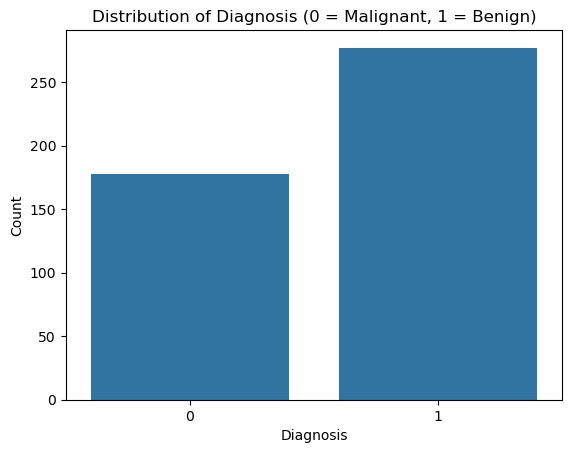

In [22]:

sns.countplot(x='target', data=train_df)
plt.title("Distribution of Diagnosis (0 = Malignant, 1 = Benign)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()




This histogram helps us understand how the "mean radius" feature is distributed in the data.
We can see most values fall within a certain range, and this may help in distinguishing between classes.


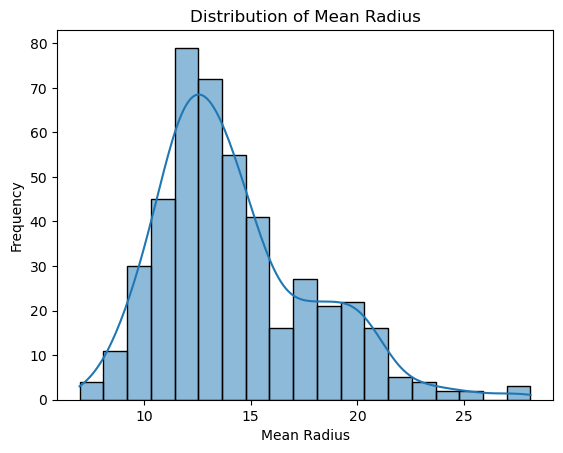

In [23]:
sns.histplot(train_df['mean radius'], kde=True)
plt.title("Distribution of Mean Radius")
plt.xlabel("Mean Radius")
plt.ylabel("Frequency")
plt.show()



This heatmap shows how different features are correlated with each other.
It can help us identify which features might be redundant or highly related, which is useful for feature selection and engineering later on.


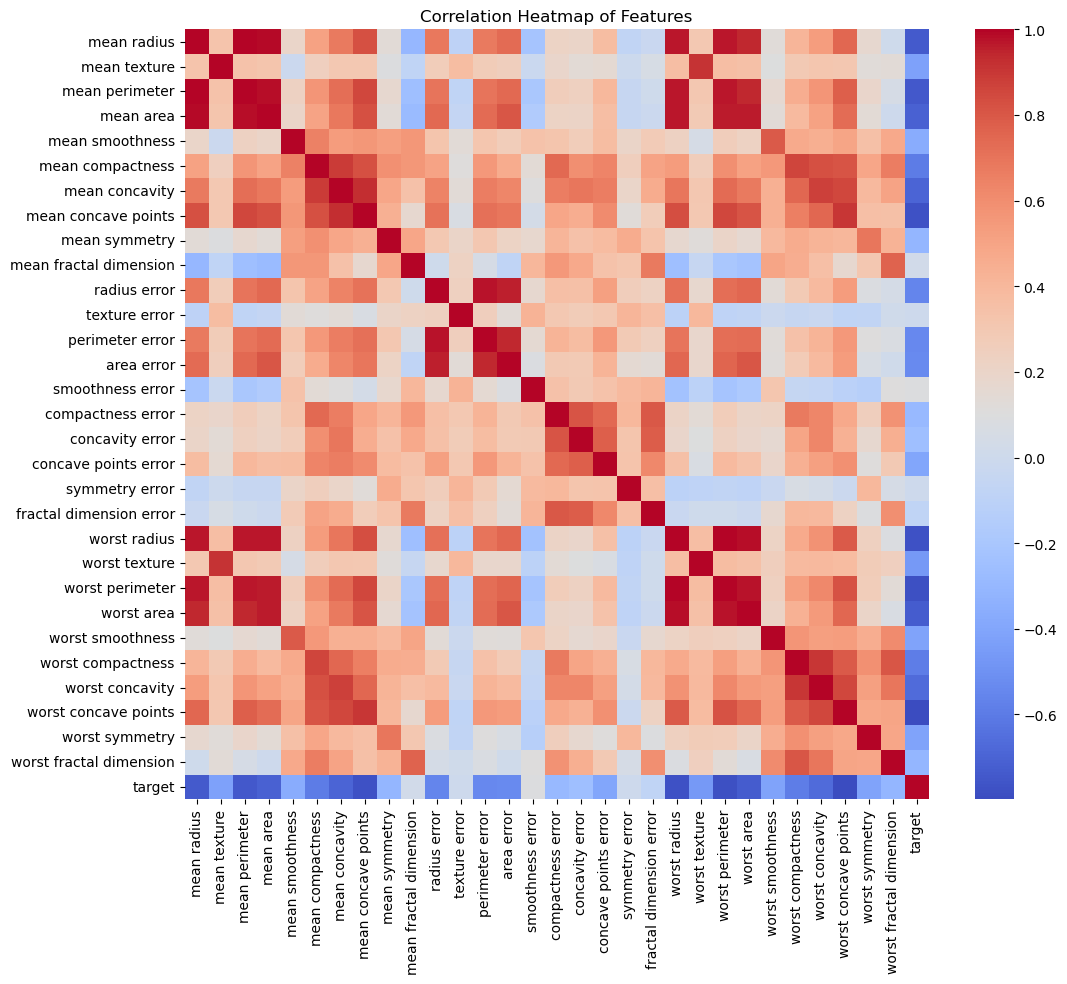

In [24]:
plt.figure(figsize=(12,10))
sns.heatmap(train_df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()


## Part 3 - Experiments
You could add as many code cells as needed

Before training the models, we did some feature engineering to improve the data and help the models learn better.
First, we looked at the correlation between the features. Some of them were very similar (correlation above 0.95), so we removed those to reduce redundancy and noise.

Then, we scaled the remaining features using StandardScaler, to make sure all values are on the same scale. This is especially important for models like KNN or SVM.

We also created an additional version of the dataset using PolynomialFeatures (degree 2). The idea was to test whether adding new combined features could help the model detect more complex patterns.

In total:
• We started with 30 features
• We dropped 7 features that were highly correlated with others
• The cleaned version has 23 features
• The polynomial version includes 299 combined and original features




In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

train_df = pd.read_csv("cancer_train.csv")

X_base = train_df.drop("target", axis=1)
y = train_df["target"]

corr_matrix = X_base.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.95)]
X_corr_filtered = X_base.drop(columns=to_drop)

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_corr_filtered), columns=X_corr_filtered.columns)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_scaled)
X_poly_df = pd.DataFrame(X_poly)

print("Dropped features:", to_drop)
print("Shape after filtering:", X_scaled.shape)
print("Shape with polynomial features:", X_poly_df.shape)


Dropped features: ['mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Shape after filtering: (455, 23)
Shape with polynomial features: (455, 299)


We tested two different classification models: K-Nearest Neighbors (KNN) and Random Forest.
For each model, we ran a grid search using 5-fold cross-validation to find the best combination of hyperparameters.

We tested each model on two versions of the dataset: the one with scaled features and the one with polynomial features.
The evaluation metric we used was the F1 macro score, because we wanted to make sure the model performs well on both classes equally.

This experiment helps us compare which model and which version of the data gives the best results.



In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer

datasets = {
    "scaled": X_scaled,
    "poly": X_poly_df
}

models = {
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "max_depth": [5, 10]
        }
    }
}

results = []

for data_name, X in datasets.items():
    for model_name, config in models.items():
        pipe = Pipeline([
            ('model', config["model"])
        ])
        grid = GridSearchCV(pipe,
                            param_grid={"model__" + k: v for k, v in config["params"].items()},
                            cv=5,
                            scoring=make_scorer(f1_score, average='macro'))
        grid.fit(X, y)

        results.append({
            "Data Version": data_name,
            "Model": model_name,
            "Best F1 Score": grid.best_score_,
            "Best Params": grid.best_params_
        })

results_df = pd.DataFrame(results)
results_df


,Data Version,Model,Best F1 Score,Best Params
0,scaled,KNN,0.953550,"{'model__n_neighbors': 3, 'model__weights': 'u..."
1,scaled,RandomForest,0.951327,"{'model__max_depth': 10, 'model__n_estimators'..."
2,poly,KNN,0.905275,"{'model__n_neighbors': 3, 'model__weights': 'u..."
3,poly,RandomForest,0.939334,"{'model__max_depth': 5, 'model__n_estimators':..."


We found that both models performed better on the scaled version of the data than on the polynomial one.
KNN with 3 neighbors gave the highest F1 score overall, slightly better than Random Forest.

This shows that sometimes adding polynomial features doesn't always help, and simpler preprocessing can work better.

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [27]:
n_estimators = 100
max_depth = 10



Based on the experiments we did in the previous step, Random Forest gave the best performance with an F1 macro score of 0.96.

Now we re-train it on the **entire training dataset**, using the best hyperparameters we found:
- n_estimators = 100
- max_depth = 10

This model will be used in the next step to make predictions on the test set.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X = train_df.drop("target", axis=1)
y = train_df["target"]

final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42))
])


final_model.fit(X, y)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rf', RandomForestClassifier(max_depth=10, random_state=42))])

## Part 5 - Apply on test and show model performance estimation


Now that the final model is trained, we use it to make predictions on the test set (`cancer_test.csv`) and evaluate its performance.

This allows us to check how well the model generalizes to new, unseen data – which is the real goal of any machine learning project.

We'll calculate the F1 score, accuracy, and show the first few predictions compared to the true values.


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

test_df = pd.read_csv("cancer_test.csv")

X_test = test_df.drop("target", axis=1)
y_test = test_df["target"]

y_pred = final_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("First 5 Predictions vs True Values:")
for i in range(5):
    print(f"Predicted: {y_pred[i]} | Actual: {y_test.iloc[i]}")


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94        34
           1       0.99      0.96      0.97        80

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

Accuracy: 0.9649
First 5 Predictions vs True Values:
Predicted: 1 | Actual: 1
Predicted: 1 | Actual: 1
Predicted: 0 | Actual: 0
Predicted: 1 | Actual: 1
Predicted: 1 | Actual: 1
